In [1]:
# Necessary imports
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


In [2]:
from torch import optim

# Defining the model
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

# Epochs : The number of times the dataset passes through the network
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        optimizer.zero_grad() # Initially assign zero gradients to all nodes
        
        output = model.forward(images) # Feed forward process
        
        loss = criterion(output, labels) # Calculate loss
        
        loss.backward()
        
        optimizer.step() # Reassigning weights (ie) Backpropogation
        
        running_loss += loss.item()
        
    # Run this loop after finishing the for loop    
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.955150376759104
Training loss: 0.9087056897278788
Training loss: 0.5400853238698008
Training loss: 0.43459238761714275
Training loss: 0.38684319858866206


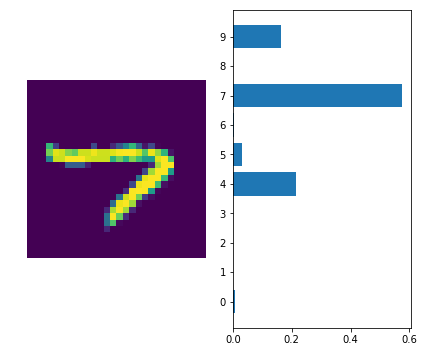

In [3]:
# Necessary imports
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)

# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = torch.exp(logps)

# Plotting this data by converting the tensor back to numpy array
ps = ps.data.numpy().squeeze()
fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
ax1.axis('off')
ax2.barh(np.arange(10), ps)
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
plt.tight_layout()

plt.show()